### Deliverable 1: Preprocessing the Data for a Neural Network

# Optimization Attempt 3 - Leaving Name column in and bucketing names that appear less than 10 times

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN"])
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

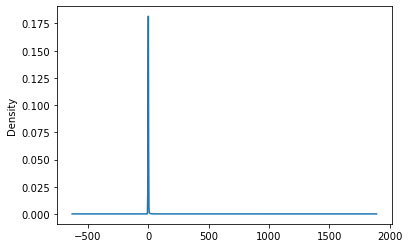

In [5]:
# Visualize the value counts of APPLICATION_TYPE
name_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_name = list(name_counts[name_counts < 10].index)

# Replace in dataframe
for app in replace_name:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                      21022
PARENT BOOSTER USA INC                      1260
TOPS CLUB INC                                765
UNITED STATES BOWLING CONGRESS INC           700
WASHINGTON STATE UNIVERSITY                  492
                                           ...  
CASCADE 4-H FOUNDATION                        10
FREE & ACCEPTED MASONS OF WASHINGTON          10
NEW MEXICO GARDEN CLUBS INC                   10
NATIONAL ASSOCIATION OF HISPANIC NURSES       10
UNION OF CALIFORNIA STATE WORKERS             10
Name: NAME, Length: 223, dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

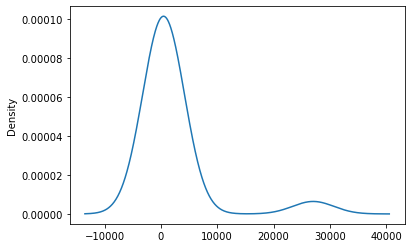

In [8]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 50].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
calssification_counts = application_df.CLASSIFICATION.value_counts()
calssification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

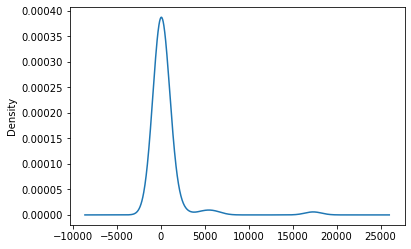

In [11]:
# Visualize the value counts of CLASSIFICATION
calssification_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(calssification_counts[calssification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\JleMx\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ART THERAPY ASSOCIATION INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\JleMx\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\JleMx\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 40
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                21520     
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 24,801
Trainable params: 24,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
# Syntax for saving every 5 epochs found at: 
#https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:45 - loss: 0.8470 - accuracy: 0.2812
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.6988 - accuracy: 0.6152  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.6703 - accuracy: 0.6482
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 0.6426 - accuracy: 0.6648
Epoch 1: saving model to checkpoints\weights.01.hdf5


525/804 [==================>...........] - ETA: 0s - loss: 0.4914 - accuracy: 0.7637
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.4918 - accuracy: 0.7634
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.4895 - accuracy: 0.7650
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.4879 - accuracy: 0.7655
Epoch 1: saving

251/804 [========>.....................] - ETA: 1s - loss: 0.4396 - accuracy: 0.7866
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.4413 - accuracy: 0.7847
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.4432 - accuracy: 0.7832
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.4442 - accuracy: 0.7830
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving


Epoch 2: saving model to checkpoints\weights.02.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.7829
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4447 - accuracy: 0.7834
Epoch 3/100
  1/804 [..............................] - ETA: 0s - loss: 0.2816 - accuracy: 0.8750
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.4470 - accuracy: 0.7739
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 37/804 [>.............................] - ETA: 2s - 


Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.4425 - accuracy: 0.7853
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.4434 - accuracy: 0.7846
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.4442 - accuracy: 0.7844
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.

238/804 [=======>......................] - ETA: 1s - loss: 0.4294 - accuracy: 0.7935
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.4343 - accuracy: 0.7905
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.4357 - accuracy: 0.7902
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.4344 - accuracy: 0.7909
Epoch 4: saving

778/804 [============================>.] - ETA: 0s - loss: 0.4378 - accuracy: 0.7880
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4387 - accuracy: 0.7874
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4387 - accuracy: 0.7875
Epoch 5/100
  1/804 [..............................] - ETA: 1s - loss: 0.4013 - accuracy: 0.8750
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.4166 - accuracy: 0.7878
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model 

499/804 [=================>............] - ETA: 0s - loss: 0.4384 - accuracy: 0.7876
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.4393 - accuracy: 0.7873
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.4389 - accuracy: 0.7873
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.4389 - accuracy: 0.7871
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving

220/804 [=======>......................] - ETA: 1s - loss: 0.4313 - accuracy: 0.7902
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.4298 - accuracy: 0.7908
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.4305 - accuracy: 0.7906
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.4302 - accuracy: 0.7900
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving

749/804 [==========================>...] - ETA: 0s - loss: 0.4363 - accuracy: 0.7894
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.4357 - accuracy: 0.7899
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4355 - accuracy: 0.7899
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4367 - accuracy: 0.7889
Epoch 7/100

Epoch 7: saving model to checkpoints\weights.07.hdf5

461/804 [================>.............] - ETA: 1s - loss: 0.4361 - accuracy: 0.7890
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.4361 - accuracy: 0.7897
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
496/804 [=================>............] - ETA: 0s - loss: 0.4360 - accuracy: 0.7899
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.4361 - accuracy: 0.7901
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving


Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 0.4427 - accuracy: 0.7806
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 0.4409 - accuracy: 0.7831
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.4391 - accuracy: 0.7836
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
242/804 [========>.....................] - ETA


Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.4337 - accuracy: 0.7900
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4343 - accuracy: 0.7899
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4346 - accuracy: 0.7898
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.

443/804 [===============>..............] - ETA: 1s - loss: 0.4336 - accuracy: 0.7915
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.4343 - accuracy: 0.7909
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.4344 - accuracy: 0.7911
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.4327 - accuracy: 0.7923
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving

164/804 [=====>........................] - ETA: 1s - loss: 0.4238 - accuracy: 0.7933
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.4234 - accuracy: 0.7943
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.4189 - accuracy: 0.7971
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.4195 - accuracy: 0.7978
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epo

691/804 [========================>.....] - ETA: 0s - loss: 0.4350 - accuracy: 0.7889
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.4349 - accuracy: 0.7885
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.4352 - accuracy: 0.7884
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.4344 - accuracy: 0.7887
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epo


Epoch 11: saving model to checkpoints\weights.11.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.4331 - accuracy: 0.7885
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.4337 - accuracy: 0.7884
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.4338 - accuracy: 0.7882
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.4336 - accuracy: 0.7884
Epo


Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.4245 - accuracy: 0.7904
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.4219 - accuracy: 0.7935
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
170/804 [=====>........................] - ETA: 1s - loss: 0.4212 - accuracy: 0.7967
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
186/804 [=====>..................

656/804 [=======================>......] - ETA: 0s - loss: 0.4312 - accuracy: 0.7918
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.4305 - accuracy: 0.7923
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.4307 - accuracy: 0.7925
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.4304 - accuracy: 0.7929
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epo

372/804 [============>.................] - ETA: 1s - loss: 0.4276 - accuracy: 0.7940
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.4290 - accuracy: 0.7934
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.4284 - accuracy: 0.7936
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.4275 - accuracy: 0.7944
Epo

 88/804 [==>...........................] - ETA: 2s - loss: 0.4254 - accuracy: 0.8022
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.4271 - accuracy: 0.7985
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.4262 - accuracy: 0.7978
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
141/804 [====>.........................] - ETA: 2s - loss: 0.4277 - accuracy: 0.7974
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epo


Epoch 14: saving model to checkpoints\weights.14.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.4308 - accuracy: 0.7916
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.4301 - accuracy: 0.7921
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.4300 - accuracy: 0.7919
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.4301 - accuracy: 0.7919
Epo

330/804 [===========>..................] - ETA: 1s - loss: 0.4280 - accuracy: 0.7942
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.4273 - accuracy: 0.7949
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.4259 - accuracy: 0.7962
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.4253 - accuracy: 0.7965
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epo

 38/804 [>.............................] - ETA: 2s - loss: 0.4201 - accuracy: 0.7903
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 0.4194 - accuracy: 0.7949
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.4167 - accuracy: 0.7975
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 0.4175 - accuracy: 0.7957
Epo

562/804 [===================>..........] - ETA: 0s - loss: 0.4260 - accuracy: 0.7939
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.4266 - accuracy: 0.7932
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.4269 - accuracy: 0.7929
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.4277 - accuracy: 0.7928
Epo

276/804 [=========>....................] - ETA: 1s - loss: 0.4295 - accuracy: 0.7947
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.4291 - accuracy: 0.7950
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.4287 - accuracy: 0.7958
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.4290 - accuracy: 0.7954
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epo

Epoch 18/100
  1/804 [..............................] - ETA: 1s - loss: 0.3249 - accuracy: 0.8438
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.3772 - accuracy: 0.8199
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.4048 - accuracy: 0.8009
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 52/804 [>.............................] - ETA: 2s - loss: 0.4143 - accuracy: 0.7975
Epoch 18: saving model to checkpoints\weights


Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.4227 - accuracy: 0.7975
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.4221 - accuracy: 0.7983
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.4226 - accuracy: 0.7983
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
587/804 [====================>...


Epoch 19: saving model to checkpoints\weights.19.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 0.4282 - accuracy: 0.7906
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.4286 - accuracy: 0.7898
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.4272 - accuracy: 0.7906
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
308/804 [==========>.............

773/804 [===========================>..] - ETA: 0s - loss: 0.4275 - accuracy: 0.7930
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.7932
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4279 - accuracy: 0.7931
Epoch 20/100
  1/804 [..............................] - ETA: 1s - loss: 0.3671 - accuracy: 0.8750
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.4003 - accuracy: 0.8141
Epoch 20: s

489/804 [=================>............] - ETA: 0s - loss: 0.4233 - accuracy: 0.7975
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.4244 - accuracy: 0.7963
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.4253 - accuracy: 0.7959
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.4249 - accuracy: 0.7960
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epo


Epoch 21: saving model to checkpoints\weights.21.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.4245 - accuracy: 0.7937
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.4236 - accuracy: 0.7932
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.4253 - accuracy: 0.7917
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
265/804 [========>...............

730/804 [==========================>...] - ETA: 0s - loss: 0.4278 - accuracy: 0.7940
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.4269 - accuracy: 0.7942
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.4269 - accuracy: 0.7943
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.7936
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epo


Epoch 22: saving model to checkpoints\weights.22.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.4279 - accuracy: 0.7948
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.4277 - accuracy: 0.7948
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.4279 - accuracy: 0.7946
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.4281 - accuracy: 0.7942
Epo

172/804 [=====>........................] - ETA: 1s - loss: 0.4328 - accuracy: 0.7922
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.4337 - accuracy: 0.7918
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
210/804 [======>.......................] - ETA: 1s - loss: 0.4366 - accuracy: 0.7906
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
227/804 [=======>......................] - ETA: 1s - loss: 0.4343 - accuracy: 0.7919
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epo

692/804 [========================>.....] - ETA: 0s - loss: 0.4267 - accuracy: 0.7943
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.4263 - accuracy: 0.7945
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.4261 - accuracy: 0.7945
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4265 - accuracy: 0.7946
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epo


Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.4265 - accuracy: 0.7976
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.4266 - accuracy: 0.7982
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.4268 - accuracy: 0.7977
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkp

124/804 [===>..........................] - ETA: 2s - loss: 0.4338 - accuracy: 0.7913
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 0.4330 - accuracy: 0.7893
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.4281 - accuracy: 0.7936
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.4267 - accuracy: 0.7928
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epo

654/804 [=======================>......] - ETA: 0s - loss: 0.4252 - accuracy: 0.7951
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.4245 - accuracy: 0.7958
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.4245 - accuracy: 0.7959
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.4254 - accuracy: 0.7955
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epo


Epoch 26: saving model to checkpoints\weights.26.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.4201 - accuracy: 0.8007
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.4191 - accuracy: 0.8009
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.4194 - accuracy: 0.8007
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
440/804 [===============>........


Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.4253 - accuracy: 0.7916
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.4281 - accuracy: 0.7924
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.4297 - accuracy: 0.7914
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
161/804 [=====>..................

621/804 [======================>.......] - ETA: 0s - loss: 0.4275 - accuracy: 0.7932
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.4279 - accuracy: 0.7933
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.4276 - accuracy: 0.7939
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.4278 - accuracy: 0.7933
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epo

337/804 [===========>..................] - ETA: 1s - loss: 0.4252 - accuracy: 0.7929
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.4240 - accuracy: 0.7938
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.4240 - accuracy: 0.7948
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.4237 - accuracy: 0.7944
Epo

 58/804 [=>............................] - ETA: 2s - loss: 0.4036 - accuracy: 0.8012
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.4040 - accuracy: 0.8017
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
 98/804 [==>...........................] - ETA: 2s - loss: 0.4021 - accuracy: 0.8058
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.4007 - accuracy: 0.8069
Epo


Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.4220 - accuracy: 0.7970
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.4225 - accuracy: 0.7965
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.4225 - accuracy: 0.7963
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkp

314/804 [==========>...................] - ETA: 1s - loss: 0.4217 - accuracy: 0.7986
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.4220 - accuracy: 0.7986
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.4226 - accuracy: 0.7984
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.4240 - accuracy: 0.7970
Epo


Epoch 31: saving model to checkpoints\weights.31.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.4388 - accuracy: 0.7867
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.4341 - accuracy: 0.7891
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.4253 - accuracy: 0.7930
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
100/804 [==>.....................

573/804 [====================>.........] - ETA: 0s - loss: 0.4241 - accuracy: 0.7952
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.4245 - accuracy: 0.7948
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.4246 - accuracy: 0.7950
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.4249 - accuracy: 0.7948
Epo

296/804 [==========>...................] - ETA: 1s - loss: 0.4215 - accuracy: 0.8001
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.4210 - accuracy: 0.8007
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.4216 - accuracy: 0.7997
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.4234 - accuracy: 0.7989
Epo

 18/804 [..............................] - ETA: 2s - loss: 0.4730 - accuracy: 0.7465
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.4487 - accuracy: 0.7720
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.4389 - accuracy: 0.7845
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.4320 - accuracy: 0.7922
Epo


Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.4204 - accuracy: 0.8003
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.4207 - accuracy: 0.7996
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.4208 - accuracy: 0.7994
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkp


Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.4194 - accuracy: 0.7970
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.4202 - accuracy: 0.7957
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.4207 - accuracy: 0.7953
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
339/804 [===========>............

Epoch 35/100
  1/804 [..............................] - ETA: 1s - loss: 0.4201 - accuracy: 0.7812
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.4579 - accuracy: 0.7730
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.4550 - accuracy: 0.7756
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.4367 - accurac

524/804 [==================>...........] - ETA: 0s - loss: 0.4258 - accuracy: 0.7933
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.4247 - accuracy: 0.7942
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.4255 - accuracy: 0.7940
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.4255 - accuracy: 0.7939
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epo


Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.4239 - accuracy: 0.7940
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.4219 - accuracy: 0.7965
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.4241 - accuracy: 0.7953
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkp

780/804 [============================>.] - ETA: 0s - loss: 0.4233 - accuracy: 0.7959
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.4228 - accuracy: 0.7963
Epoch 36: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4228 - accuracy: 0.7962
Epoch 37/100

Epoch 37: saving model to checkpoints\weights.37.hdf5
  1/804 [..............................] - ETA: 8s - loss: 0.3180 - accuracy: 0.9062
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.4231 - accuracy: 0.7991
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: s


Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.4209 - accuracy: 0.7966
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.4196 - accuracy: 0.7974
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.4205 - accuracy: 0.7966
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkp

217/804 [=======>......................] - ETA: 1s - loss: 0.4166 - accuracy: 0.7975
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.4147 - accuracy: 0.7994
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.4130 - accuracy: 0.8006
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.4109 - accuracy: 0.8026
Epo

752/804 [===========================>..] - ETA: 0s - loss: 0.4216 - accuracy: 0.7960
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.4216 - accuracy: 0.7963
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.4220 - accuracy: 0.7961
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4222 - accuracy: 0.7965
Epoch 39/100
  1/804 [..............................] - ETA: 1s - loss: 0.4897 - accuracy: 0.7812
Epoch 39: s


Epoch 39: saving model to checkpoints\weights.39.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.4221 - accuracy: 0.7980
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.4242 - accuracy: 0.7961
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.4248 - accuracy: 0.7955
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
538/804 [===================>....

189/804 [======>.......................] - ETA: 1s - loss: 0.4216 - accuracy: 0.7938
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.4221 - accuracy: 0.7943
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.4199 - accuracy: 0.7975
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.4218 - accuracy: 0.7953
Epo


Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.4206 - accuracy: 0.7967
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.4209 - accuracy: 0.7963
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.4221 - accuracy: 0.7955
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkp

435/804 [===============>..............] - ETA: 1s - loss: 0.4175 - accuracy: 0.8019
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.4183 - accuracy: 0.8014
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.4195 - accuracy: 0.8009
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
495/804 [=================>............] - ETA: 0s - loss: 0.4203 - accuracy: 0.7998
Epo


Epoch 42: saving model to checkpoints\weights.42.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.4243 - accuracy: 0.7964
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.4271 - accuracy: 0.7947
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.4246 - accuracy: 0.7960
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
221/804 [=======>................

695/804 [========================>.....] - ETA: 0s - loss: 0.4229 - accuracy: 0.7967
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.4220 - accuracy: 0.7973
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.4216 - accuracy: 0.7977
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4217 - accuracy: 0.7978
Epo

404/804 [==============>...............] - ETA: 1s - loss: 0.4212 - accuracy: 0.7991
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.4211 - accuracy: 0.7992
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.4226 - accuracy: 0.7976
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
462/804 [================>.............] - ETA: 0s - loss: 0.4222 - accuracy: 0.7978
Epo


Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.4129 - accuracy: 0.8036
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 0.4132 - accuracy: 0.8035
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
170/804 [=====>........................] - ETA: 1s - loss: 0.4142 - accuracy: 0.8026
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
188/804 [======>.................


Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.4214 - accuracy: 0.7979
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.4208 - accuracy: 0.7981
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.4212 - accuracy: 0.7981
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkp


Epoch 45: saving model to checkpoints\weights.45.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.4233 - accuracy: 0.7968
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.4228 - accuracy: 0.7975
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.4217 - accuracy: 0.7975
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.4216 - accuracy: 0.7977
Epo

 95/804 [==>...........................] - ETA: 2s - loss: 0.4132 - accuracy: 0.8000
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 0.4140 - accuracy: 0.8014
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
130/804 [===>..........................] - ETA: 1s - loss: 0.4161 - accuracy: 0.7990
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.4178 - accuracy: 0.7998
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epo

620/804 [======================>.......] - ETA: 0s - loss: 0.4214 - accuracy: 0.7972
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.4220 - accuracy: 0.7968
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.4208 - accuracy: 0.7975
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.4216 - accuracy: 0.7969
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epo


Epoch 47: saving model to checkpoints\weights.47.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.4239 - accuracy: 0.7954
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.4222 - accuracy: 0.7961
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.4220 - accuracy: 0.7961
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
406/804 [==============>.........


Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.4065 - accuracy: 0.8095
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.4067 - accuracy: 0.8094
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.4056 - accuracy: 0.8111
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
131/804 [===>....................


Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.4179 - accuracy: 0.8003
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.4179 - accuracy: 0.8003
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.4187 - accuracy: 0.8003
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkp


Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.4219 - accuracy: 0.7952
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.4224 - accuracy: 0.7952
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.4235 - accuracy: 0.7944
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
373/804 [============>...........

 19/804 [..............................] - ETA: 2s - loss: 0.4165 - accuracy: 0.7993
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.4129 - accuracy: 0.8045
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 0.4233 - accuracy: 0.7972
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.4163 - accuracy: 0.8015
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epo


Epoch 50: saving model to checkpoints\weights.50.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.4203 - accuracy: 0.7968
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.4206 - accuracy: 0.7974
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.4220 - accuracy: 0.7962
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.4215 - accuracy: 0.7968
Epo

259/804 [========>.....................] - ETA: 1s - loss: 0.4237 - accuracy: 0.7989
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.4228 - accuracy: 0.7997
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.4218 - accuracy: 0.8003
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.4203 - accuracy: 0.8011
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epo

784/804 [============================>.] - ETA: 0s - loss: 0.4204 - accuracy: 0.7987
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4200 - accuracy: 0.7987
Epoch 52/100

Epoch 52: saving model to checkpoints\weights.52.hdf5
  1/804 [..............................] - ETA: 9s - loss: 0.4360 - accuracy: 0.8750
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.4324 - accuracy: 0.7887
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\we


Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.4215 - accuracy: 0.7969
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.4214 - accuracy: 0.7966
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.4208 - accuracy: 0.7971
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkp


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.4116 - accuracy: 0.7989
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.4137 - accuracy: 0.7980
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.4125 - accuracy: 0.7993
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.4140 - accuracy: 0.7982
Epo


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.4190 - accuracy: 0.7982
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4190 - accuracy: 0.7982
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.4192 - accuracy: 0.7979
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
787/804 [========================

432/804 [===============>..............] - ETA: 1s - loss: 0.4175 - accuracy: 0.7973
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.4173 - accuracy: 0.7979
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.4163 - accuracy: 0.7985
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.4153 - accuracy: 0.7996
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epo

142/804 [====>.........................] - ETA: 1s - loss: 0.4156 - accuracy: 0.7947
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.4191 - accuracy: 0.7937
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.4210 - accuracy: 0.7920
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 0.4199 - accuracy: 0.7936
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epo

664/804 [=======================>......] - ETA: 0s - loss: 0.4192 - accuracy: 0.7978
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.4191 - accuracy: 0.7980
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.4184 - accuracy: 0.7983
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.4186 - accuracy: 0.7984
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epo


Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.4149 - accuracy: 0.8011
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.4150 - accuracy: 0.8007
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.4149 - accuracy: 0.8013
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkp

 86/804 [==>...........................] - ETA: 2s - loss: 0.4013 - accuracy: 0.8031
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.4066 - accuracy: 0.7992
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.4082 - accuracy: 0.8006
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.4157 - accuracy: 0.7983
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epo

616/804 [=====================>........] - ETA: 0s - loss: 0.4149 - accuracy: 0.8008
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.4154 - accuracy: 0.8009
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.4157 - accuracy: 0.8004
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.4158 - accuracy: 0.8003
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epo

322/804 [===========>..................] - ETA: 1s - loss: 0.4160 - accuracy: 0.8009
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.4153 - accuracy: 0.8012
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.4160 - accuracy: 0.8009
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.4160 - accuracy: 0.8012
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epo


Epoch 59: saving model to checkpoints\weights.59.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.3987 - accuracy: 0.8183
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.4096 - accuracy: 0.8082
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.4058 - accuracy: 0.8121
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.4053 - accuracy: 0.8101
Epo


Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.4192 - accuracy: 0.7998
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.4183 - accuracy: 0.8002
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.4183 - accuracy: 0.7999
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkp


Epoch 60: saving model to checkpoints\weights.60.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.4061 - accuracy: 0.8073
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.4057 - accuracy: 0.8072
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.4092 - accuracy: 0.8050
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.4111 - accuracy: 0.8034
Epo


Epoch 60: saving model to checkpoints\weights.60.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.4187 - accuracy: 0.7976
Epoch 60: saving model to checkpoints\weights.60.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4185 - accuracy: 0.7978
Epoch 61/100
  1/804 [..............................] - ETA: 1s - loss: 0.3748 - accuracy: 0.8125
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.4110 - accuracy: 0.8016
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.3931 - accuracy: 0.8125
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: s


Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.4184 - accuracy: 0.7966
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.4185 - accuracy: 0.7968
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.4190 - accuracy: 0.7966
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkp

226/804 [=======>......................] - ETA: 1s - loss: 0.4239 - accuracy: 0.7963
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.4216 - accuracy: 0.7984
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.4222 - accuracy: 0.7985
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.4191 - accuracy: 0.8002
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epo


Epoch 62: saving model to checkpoints\weights.62.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4173 - accuracy: 0.7996
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4185 - accuracy: 0.7985
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4185 - accuracy: 0.7984
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4182 - accuracy: 0.7987
Epoch 63/100
  1/804 [..............................] - ETA: 1s - loss: 0.5485 - accuracy: 0.7188
Epoch 63: s


Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.4147 - accuracy: 0.8022
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.4142 - accuracy: 0.8025
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.4157 - accuracy: 0.8016
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
527/804 [==================>.....

181/804 [=====>........................] - ETA: 1s - loss: 0.4185 - accuracy: 0.7977
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.4217 - accuracy: 0.7947
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.4215 - accuracy: 0.7938
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 0.4216 - accuracy: 0.7943
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epo

703/804 [=========================>....] - ETA: 0s - loss: 0.4166 - accuracy: 0.7998
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.4172 - accuracy: 0.7993
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.4177 - accuracy: 0.7990
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.4182 - accuracy: 0.7985
Epo

413/804 [==============>...............] - ETA: 1s - loss: 0.4180 - accuracy: 0.7968
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.4182 - accuracy: 0.7962
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.4187 - accuracy: 0.7959
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.4176 - accuracy: 0.7969
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epo


Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 0.4214 - accuracy: 0.7897
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.4178 - accuracy: 0.7931
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.4153 - accuracy: 0.7961
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.4128 - accuracy: 0.7974
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epo


Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.4203 - accuracy: 0.7961
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.4195 - accuracy: 0.7969
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.4194 - accuracy: 0.7969
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkp


Epoch 67: saving model to checkpoints\weights.67.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.4133 - accuracy: 0.7994
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.4129 - accuracy: 0.8000
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.4133 - accuracy: 0.8001
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.4142 - accuracy: 0.8000
Epo


Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.4145 - accuracy: 0.8056
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.4114 - accuracy: 0.8057
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.4099 - accuracy: 0.8040
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkp


Epoch 68: saving model to checkpoints\weights.68.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.4155 - accuracy: 0.7997
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.4160 - accuracy: 0.7996
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.4161 - accuracy: 0.7995
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.4153 - accuracy: 0.8001
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epo

297/804 [==========>...................] - ETA: 1s - loss: 0.4116 - accuracy: 0.8033
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.4119 - accuracy: 0.8026
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.4113 - accuracy: 0.8027
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.4118 - accuracy: 0.8029
Epo

  1/804 [..............................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7500
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.4184 - accuracy: 0.7928
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 0.4338 - accuracy: 0.7847
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 0.4238 - accuracy: 0.7886
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epo

519/804 [==================>...........] - ETA: 0s - loss: 0.4167 - accuracy: 0.7986
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.4171 - accuracy: 0.7983
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.4175 - accuracy: 0.7982
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.4174 - accuracy: 0.7980
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epo

230/804 [=======>......................] - ETA: 1s - loss: 0.4162 - accuracy: 0.8053
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.4142 - accuracy: 0.8054
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.4130 - accuracy: 0.8061
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.4127 - accuracy: 0.8062
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epo

750/804 [==========================>...] - ETA: 0s - loss: 0.4177 - accuracy: 0.7986
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.4177 - accuracy: 0.7986
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.4177 - accuracy: 0.7985
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4177 - accuracy: 0.7987
Epoch 72/100

Epoch 72: saving model to checkpoints\weights.72.hdf5
  1/804 [..............................] 


Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.4160 - accuracy: 0.7989
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.4161 - accuracy: 0.7991
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.4168 - accuracy: 0.7990
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
526/804 [==================>.....


Epoch 73: saving model to checkpoints\weights.73.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.4203 - accuracy: 0.7966
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.4199 - accuracy: 0.7958
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.4187 - accuracy: 0.7951
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.4172 - accuracy: 0.7966
Epo

700/804 [=========================>....] - ETA: 0s - loss: 0.4188 - accuracy: 0.7976
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.4193 - accuracy: 0.7972
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.4186 - accuracy: 0.7976
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.4181 - accuracy: 0.7981
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epo


Epoch 74: saving model to checkpoints\weights.74.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.4125 - accuracy: 0.8010
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.4139 - accuracy: 0.8012
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.4123 - accuracy: 0.8022
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.4138 - accuracy: 0.8011
Epo


Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
129/804 [===>..........................] - ETA: 2s - loss: 0.4085 - accuracy: 0.8084
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 0.4102 - accuracy: 0.8064
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
164/804 [=====>........................] - ETA: 1s - loss: 0.4075 - accuracy: 0.8079
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.4101 - accuracy: 0.8064
Epo


Epoch 75: saving model to checkpoints\weights.75.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.4160 - accuracy: 0.7989
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.4153 - accuracy: 0.7992
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.4142 - accuracy: 0.8003
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.4145 - accuracy: 0.8002
Epo


Epoch 76: saving model to checkpoints\weights.76.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.4135 - accuracy: 0.8007
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.4144 - accuracy: 0.8007
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.4145 - accuracy: 0.8003
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.4137 - accuracy: 0.8009
Epo

 76/804 [=>............................] - ETA: 2s - loss: 0.4037 - accuracy: 0.8084
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.4046 - accuracy: 0.8092
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
111/804 [===>..........................] - ETA: 2s - loss: 0.4021 - accuracy: 0.8125
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.4008 - accuracy: 0.8123
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epo

594/804 [=====================>........] - ETA: 0s - loss: 0.4171 - accuracy: 0.7997
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.4176 - accuracy: 0.7997
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.4166 - accuracy: 0.8000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.4169 - accuracy: 0.7995
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epo


Epoch 78: saving model to checkpoints\weights.78.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.4145 - accuracy: 0.8016
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.4154 - accuracy: 0.8008
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.4156 - accuracy: 0.8007
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.4136 - accuracy: 0.8016
Epo


Epoch 79: saving model to checkpoints\weights.79.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.4002 - accuracy: 0.8125
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.4011 - accuracy: 0.8057
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.3953 - accuracy: 0.8101
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.3936 - accuracy: 0.8151
Epo

541/804 [===================>..........] - ETA: 0s - loss: 0.4132 - accuracy: 0.8001
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.4127 - accuracy: 0.8003
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.4135 - accuracy: 0.7993
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.4128 - accuracy: 0.8000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epo


Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.4155 - accuracy: 0.7998
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.4143 - accuracy: 0.8008
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.4145 - accuracy: 0.8013
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkp

785/804 [============================>.] - ETA: 0s - loss: 0.4171 - accuracy: 0.7991
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4169 - accuracy: 0.7990
Epoch 81/100
  1/804 [..............................] - ETA: 0s - loss: 0.4644 - accuracy: 0.7500
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.4069 - accuracy: 0.8000
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 37/804 [>.............................] 

495/804 [=================>............] - ETA: 0s - loss: 0.4107 - accuracy: 0.8039
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 0.4112 - accuracy: 0.8029
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.4106 - accuracy: 0.8038
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.4104 - accuracy: 0.8038
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epo


Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 0.4197 - accuracy: 0.7952
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.4183 - accuracy: 0.7959
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.4192 - accuracy: 0.7959
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
281/804 [=========>..............

742/804 [==========================>...] - ETA: 0s - loss: 0.4170 - accuracy: 0.7989
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4170 - accuracy: 0.7990
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.4163 - accuracy: 0.7993
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4163 - accuracy: 0.7996
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
804/

453/804 [===============>..............] - ETA: 1s - loss: 0.4128 - accuracy: 0.7995
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.4130 - accuracy: 0.7997
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.4127 - accuracy: 0.7997
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 0.4142 - accuracy: 0.7988
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epo


Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 0.4131 - accuracy: 0.8033
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 0.4150 - accuracy: 0.8000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 0.4141 - accuracy: 0.8008
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
228/804 [=======>................


Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.4166 - accuracy: 0.7999
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.4168 - accuracy: 0.7996
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.4172 - accuracy: 0.7992
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
756/804 [========================

404/804 [==============>...............] - ETA: 1s - loss: 0.4181 - accuracy: 0.7981
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.4196 - accuracy: 0.7970
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.4189 - accuracy: 0.7973
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.4184 - accuracy: 0.7979
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epo


Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 0.4234 - accuracy: 0.7923
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 0.4229 - accuracy: 0.7935
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 0.4217 - accuracy: 0.7937
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkp


Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.4162 - accuracy: 0.7991
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.4164 - accuracy: 0.7991
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.4160 - accuracy: 0.7990
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
705/804 [========================


Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.4139 - accuracy: 0.7993
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.4119 - accuracy: 0.8004
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.4112 - accuracy: 0.8008
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
419/804 [==============>.........


Epoch 88: saving model to checkpoints\weights.88.hdf5
 70/804 [=>............................] - ETA: 2s - loss: 0.4254 - accuracy: 0.7875
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 0.4208 - accuracy: 0.7929
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.4174 - accuracy: 0.7947
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 0.4193 - accuracy: 0.7933
Epo


Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.4169 - accuracy: 0.7972
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.4165 - accuracy: 0.7975
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.4166 - accuracy: 0.7978
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.4161 - accuracy: 0.7982
Epo

302/804 [==========>...................] - ETA: 1s - loss: 0.4158 - accuracy: 0.8009
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.4156 - accuracy: 0.8014
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.4141 - accuracy: 0.8014
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.4136 - accuracy: 0.8009
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epo


Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.4129 - accuracy: 0.7878
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.4327 - accuracy: 0.7861
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.4178 - accuracy: 0.7963
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkp

534/804 [==================>...........] - ETA: 0s - loss: 0.4147 - accuracy: 0.8009
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.4147 - accuracy: 0.8005
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.4151 - accuracy: 0.8005
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.4156 - accuracy: 0.8007
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epo


Epoch 91: saving model to checkpoints\weights.91.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.4164 - accuracy: 0.7993
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.4154 - accuracy: 0.7991
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.4133 - accuracy: 0.8010
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
320/804 [==========>.............


Epoch 91: saving model to checkpoints\weights.91.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4157 - accuracy: 0.8001
Epoch 91: saving model to checkpoints\weights.91.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4159 - accuracy: 0.8000
Epoch 92/100

Epoch 92: saving model to checkpoints\weights.92.hdf5
  1/804 [..............................] - ETA: 16s - loss: 0.4448 - accuracy: 0.8438
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.4171 - accuracy: 0.8021 
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.4151 - accuracy: 0.8002
Epoch 92:


Epoch 92: saving model to checkpoints\weights.92.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.4160 - accuracy: 0.7997
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.4149 - accuracy: 0.8006
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.4153 - accuracy: 0.7999
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.4152 - accuracy: 0.7992
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epo


Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.4167 - accuracy: 0.7995
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 0.4180 - accuracy: 0.7987
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.4171 - accuracy: 0.7996
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkp


Epoch 93: saving model to checkpoints\weights.93.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.4156 - accuracy: 0.7995
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4157 - accuracy: 0.7995
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.4159 - accuracy: 0.7994
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4159 - accuracy: 0.7996
Epoch 94/100
  1/804 [..............................] 


Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
472/804 [================>.............] - ETA: 0s - loss: 0.4112 - accuracy: 0.8024
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.4129 - accuracy: 0.8015
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.4129 - accuracy: 0.8017
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkp

178/804 [=====>........................] - ETA: 1s - loss: 0.4117 - accuracy: 0.8044
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 0.4107 - accuracy: 0.8035
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.4108 - accuracy: 0.8043
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.4123 - accuracy: 0.8029
Epo


Epoch 95: saving model to checkpoints\weights.95.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.4159 - accuracy: 0.7999
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.4160 - accuracy: 0.7998
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.4161 - accuracy: 0.7998
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.4160 - accuracy: 0.8001
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epo


Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.4121 - accuracy: 0.8028
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.4128 - accuracy: 0.8019
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.4123 - accuracy: 0.8020
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.4128 - accuracy: 0.8017
Epo

126/804 [===>..........................] - ETA: 2s - loss: 0.4198 - accuracy: 0.7919
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.4190 - accuracy: 0.7920
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.4232 - accuracy: 0.7910
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.4207 - accuracy: 0.7921
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epo


Epoch 97: saving model to checkpoints\weights.97.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.4161 - accuracy: 0.7980
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.4158 - accuracy: 0.7983
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.4161 - accuracy: 0.7984
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.4161 - accuracy: 0.7990
Epo


Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.4143 - accuracy: 0.8015
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.4160 - accuracy: 0.8004
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.4158 - accuracy: 0.8004
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.4160 - accuracy: 0.8004
Epo

 76/804 [=>............................] - ETA: 2s - loss: 0.4121 - accuracy: 0.8026
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.4157 - accuracy: 0.7977
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.4161 - accuracy: 0.7973
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.4112 - accuracy: 0.8012
Epo


Epoch 99: saving model to checkpoints\weights.99.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.4156 - accuracy: 0.7988
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.4162 - accuracy: 0.7982
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.4159 - accuracy: 0.7985
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
663/804 [=======================>

313/804 [==========>...................] - ETA: 1s - loss: 0.4173 - accuracy: 0.7984
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.4177 - accuracy: 0.7977
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.4156 - accuracy: 0.7987
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.4162 - accuracy: 0.7982
Epoch 100: saving model to checkpoin

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4680 - accuracy: 0.7797 - 267ms/epoch - 996us/step
Loss: 0.46801093220710754, Accuracy: 0.7797084450721741


In [ ]:
# Syntax to save model found at:
#https://www.tensorflow.org/guide/keras/save_and_serialize
nn.save('AlphabetSoupCharity_Optimization_3.h5')